<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/MIDPCD_H071201091_Ufairah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MID Pemrosesan Data Citra

Nama: Ufairah Damara Bashir
<br> NIM: H071201091


install ibrary

In [ ]:
from numpy import *
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from PIL import Image

mount to my google account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Ubah ukuran citra banana.jpg menjadi setengah dari ukuran semula (300x450).

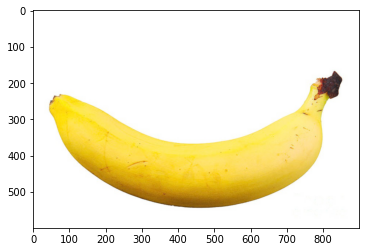

In [ ]:
banana = mpimg.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/banana.jpg')
plt.imshow(banana)

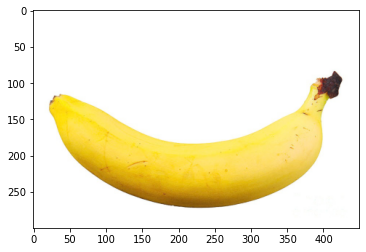

In [ ]:
image_resize = cv2.resize(banana, (450, 300))
plt.imshow(image_resize)

### 2. Tampilkan histogram citra bird.jpg untuk masing-masing komponen warna dalam satu grafik.

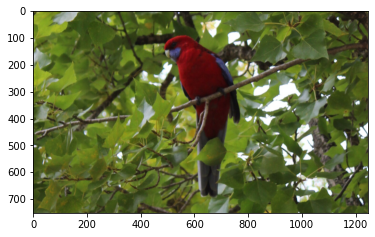

In [ ]:
bird = mpimg.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/bird.jpg')
plt.imshow(bird)

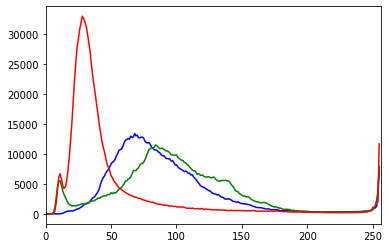

In [ ]:

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([bird],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 3. Gunakan perataan histogram untuk masing-masing komponen warna 
untuk memperbaiki kualitas
citra kabut.png. Tampilkan histogramnya sebelum dan sesudah perataan untuk masing-masing
komponen warna.

- citra kabut sebelum diratakan

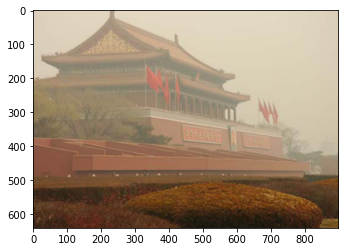

In [ ]:
kabut = mpimg.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/kabut.png')
plt.imshow(kabut)

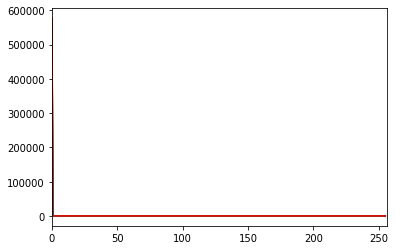

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([kabut],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

meratakan warna kabut

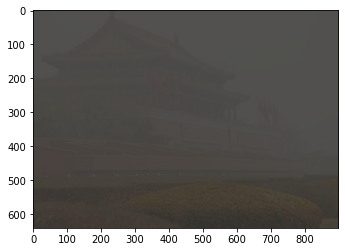

In [ ]:
abc = np.array(255*(kabut / 255) ** 0.2, dtype = 'uint8')

plt.imshow(abc)

### 4. Proses gambar banana.jpg menggunakan highpass filter untuk menghasilkan output seperti pada gambar berikut:

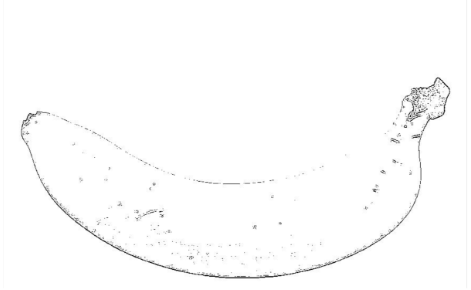

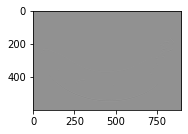

In [ ]:
img = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/banana.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

sobely = cv2.Sobel(img,cv2.CV_64F,0,3,ksize=5)

plt.subplot(2,2,4),plt.imshow(sobely, cmap = 'gray')
plt.show()

### 5. Hilangkan noise pada citra phone_noise.jpg menggunakan average dan median filter.

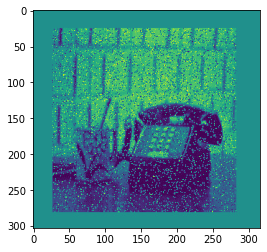

In [ ]:
phone = mpimg.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/phone_noise.jpg')
plt.imshow(phone)

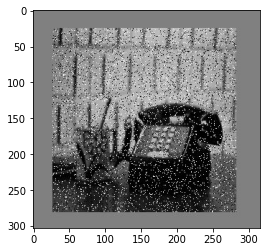

In [ ]:
newphone = cv2.cvtColor(phone, cv2.COLOR_BGR2RGB)

plt.imshow(newphone)

median

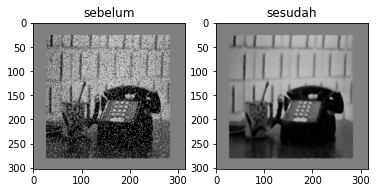

In [ ]:
blur = cv2.medianBlur(newphone,5)

plt.subplot(121),plt.imshow(newphone),plt.title('sebelum')
plt.subplot(122),plt.imshow(blur),plt.title('sesudah')
plt.show()

average

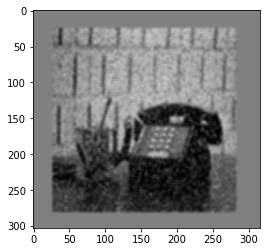

In [ ]:
blur = cv2.blur(newphone,(5,5))

plt.imshow(blur)

### 6. Gunakan citra burung.jpg sebagai latar belakang citra banana.jpg seperti pada gambar berikut:

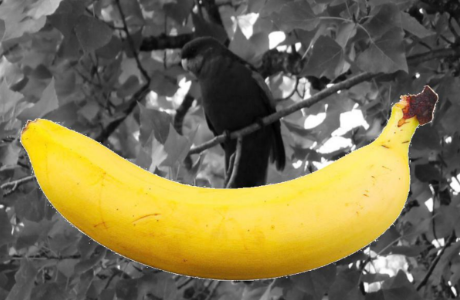

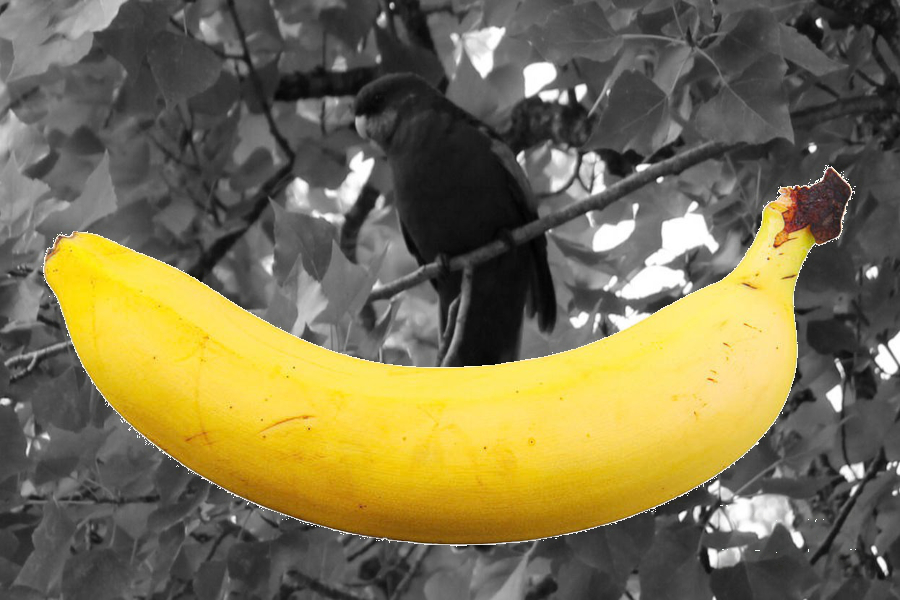

In [ ]:
bann = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/banana.jpg')
burr = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/midcitra/burung.jpg')


rows,cols,chanels = burr.shape
xx = bann[0:rows, 0:cols]

img2gray = cv2.cvtColor(burr,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 2, 255, cv2.THRESH_BINARY)
maskk = cv2.bitwise_not(mask)
img1gray = cv2.cvtColor(bann,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img1gray, 248, 255, cv2.THRESH_BINARY)
maskk = cv2.bitwise_not(mask)


img1_burr = cv2.bitwise_and(xx, xx, mask = maskk)


img2_bann = cv2.bitwise_and(bann, burr, mask=mask)

dst = cv2.add(img1_burr,img2_bann)
bann[0:rows, 0:cols] = dst

cv2_imshow(bann)
cv2.waitKey(0)
cv2.destroyAllWindows()